## Observations and Insights 

Findings: 
Tumor volume was observed in a 45 day trial of 10 drug regimens on 248 mice. In studying the four leading treatments, final tumor volume for Capomulin and Ramicane was lower than that of Infubinol and Ceftamin. Average tumor volume was highily correlated with subject weight.  Individual data for subject s185 shows a promising decline in tumor volume over the period of observation. While these results show promise for Capomulin, an analysis controlling for beginning tumor volume and weight of mouse for each treatment group could provide a more complete picture of the efffectiveness of Capomulin. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.describe()
#249 data rows/mice in origianl data file


,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [2]:
study_results = pd.read_csv(study_results_path)
study_results.describe()
#1893 records in original file


,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [3]:
# Combine the data into a single dataset
combine=pd.merge(mouse_metadata,study_results, how='outer',on='Mouse ID' )
# Display the data table for preview
combine.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#Find the number of mice in the dataset
combine['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_time=combine.groupby(['Mouse ID','Timepoint'])
dups = mouse_time.count()
dups[dups['Sex']>1]

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

combine[combine['Mouse ID']=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
clean=combine[combine['Mouse ID']!="g989"]
clean['Mouse ID'].nunique()
#248 mice in the clean dataset

248

In [8]:
clean.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen=clean.groupby('Drug Regimen')
reg_mean=regimen['Tumor Volume (mm3)'].mean()
reg_median=regimen['Tumor Volume (mm3)'].median()
reg_var=regimen['Tumor Volume (mm3)'].var()
reg_std=regimen['Tumor Volume (mm3)'].std()
reg_SEM=regimen['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": reg_mean,
                           "Median": reg_median,
                          "Variance":reg_var,
                          "STD":reg_std,
                          "SEM":reg_SEM})

summary_df


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Count of Mice')

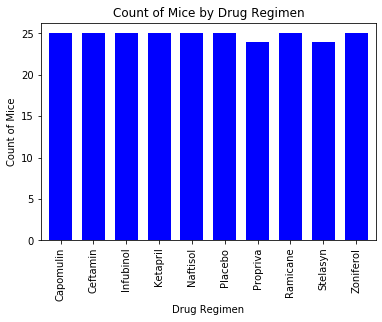

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

reg_count=regimen['Mouse ID'].nunique()

ax=reg_count.plot.bar(x='Drug Regimen', y='Mouse ID', color="b", rot=90, title="Count of Mice by Drug Regimen", width=.7)
ax.set_ylabel("Count of Mice")


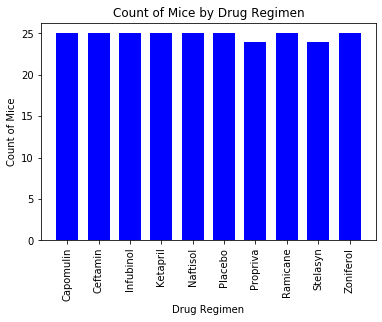

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
reg_df=pd.DataFrame(reg_count)
reg_df['drug']=reg_df.index

x_axis = np.arange(len(reg_df))
plt.bar(x_axis, reg_df["Mouse ID"], color="b", align="center", width=.7)
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Mice')
plt.title('Count of Mice by Drug Regimen')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, reg_df['drug'], rotation=90)
plt.show()


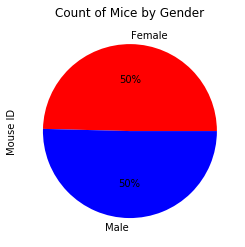

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex=clean.groupby('Sex')
count=sex['Mouse ID'].nunique()
plot = count.plot.pie(y='count', title="Count of Mice by Gender", colors=['red','blue'], autopct='%1.0f%%')






Text(0.5, 1.0, 'Count of Mice by Gender')

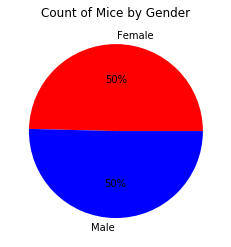

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = pd.DataFrame({"Sex":["Female","Male"],
                        "Mice":count})
plt.pie(count, labels=sex_df['Sex'], colors=['red','blue'], autopct='%1.0f%%')
plt.title("Count of Mice by Gender")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#limit to four treatments first, merge keep only those in groups of interest
keep=pd.DataFrame({"Drug Regimen":['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']})
new_df=pd.merge(keep,clean,how='left',on='Drug Regimen')
#group limited dataset by Mouse ID
grp_df=new_df.groupby("Mouse ID")
#find the max timepoint for each mouse ID
max_tp=grp_df['Timepoint'].max()
#merge back to limited dataset, include only max timepoint
final_df=pd.merge(max_tp,new_df,how='left',on=['Mouse ID','Timepoint'])


In [29]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
grp_fin_df=final_df.groupby('Drug Regimen')

quartiles = final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [36]:
outlier_df=final_df.loc[final_df['Tumor Volume (mm3)']>upper_bound] | final_df.loc[final_df['Tumor Volume (mm3)']<lower_bound]
outlier_df



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

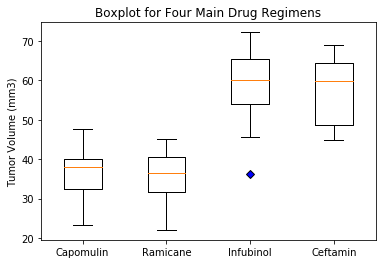

In [32]:

cap_tumors=final_df.loc[final_df['Drug Regimen']=="Capomulin",'Tumor Volume (mm3)'].to_list()
ram_tumors=final_df.loc[final_df['Drug Regimen']=="Ramicane",'Tumor Volume (mm3)'].to_list()                 
inf_tumors=final_df.loc[final_df['Drug Regimen']=="Infubinol",'Tumor Volume (mm3)'].to_list()
cef_tumors=final_df.loc[final_df['Drug Regimen']=="Ceftamin",'Tumor Volume (mm3)'].to_list()


my_dict = {'Capomulin': cap_tumors, 
           'Ramicane': ram_tumors,
           'Infubinol': inf_tumors,
           'Ceftamin': cef_tumors}

blue_diamond = dict(markerfacecolor='b', marker='D')
fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), flierprops=blue_diamond)
ax.set_title("Boxplot for Four Main Drug Regimens")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xticklabels(my_dict.keys())



## Line and Scatter Plots

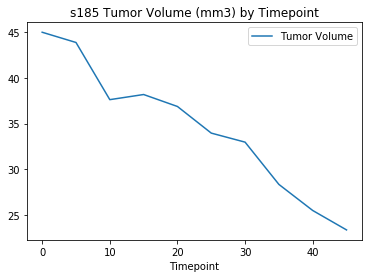

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_one=clean.loc[clean['Drug Regimen']=='Capomulin']
df_one.head()
#keep only records for Mouse ID=s185
Mouse="s185"
df_one=clean.loc[clean['Mouse ID']==Mouse,['Timepoint','Tumor Volume (mm3)']]
df_one.plot.line('Timepoint','Tumor Volume (mm3)',label="Tumor Volume",title=Mouse+" Tumor Volume (mm3) by Timepoint")


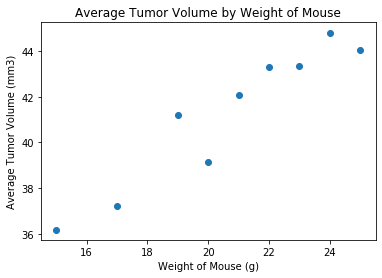

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_cap=clean.loc[clean['Drug Regimen']=='Capomulin']
grp_cap_df=df_cap.groupby('Weight (g)').mean()
grp_cap_df['wt'] = grp_cap_df.index
x_values=grp_cap_df['wt']
y_values=grp_cap_df['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.title("Average Tumor Volume by Weight of Mouse")
plt.xlabel('Weight of Mouse (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [33]:
#Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen




correlation=st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}.")


The correlation between mouse weight and tumor volume is 0.95.


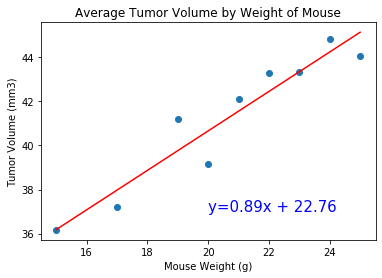

In [32]:

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq="y="+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Average Tumor Volume by Weight of Mouse")
plt.annotate(line_eq,(20,37),fontsize=15,color="blue")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
